In [40]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
import cv2
import numpy as np
import skdemo
from sklearn.externals import joblib
from skimage.feature import hog


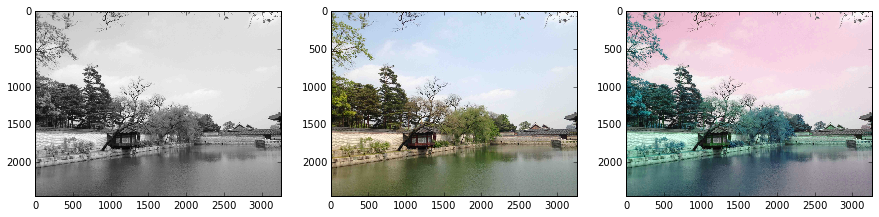

In [2]:
plt.figure(figsize=(16,12))

bgr_img = cv2.imread('./data/IMG_4137.jpg')

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

b,g,r = cv2.split(bgr_img)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb
brg_img = cv2.merge([b,r,g])     # switch it to rgb

skdemo.imshow_all(gray_img, rgb_img, brg_img)

In [9]:
img_file = './data/IMG_4137.jpg'
img = cv2.imread(img_file, cv2.IMREAD_COLOR)           # rgb
alpha_img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED) # rgba
gray_img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)  # grayscale

print type(img)
print 'RGB shape: ', img.shape        # Rows, cols, channels
print 'ARGB shape:', alpha_img.shape
print 'Gray shape:', gray_img.shape
print 'img.dtype: ', img.dtype
print 'img.size: ', img.size

<type 'numpy.ndarray'>
RGB shape:  (2448, 3264, 3)
ARGB shape: (2448, 3264, 3)
Gray shape: (2448, 3264)
img.dtype:  uint8
img.size:  23970816


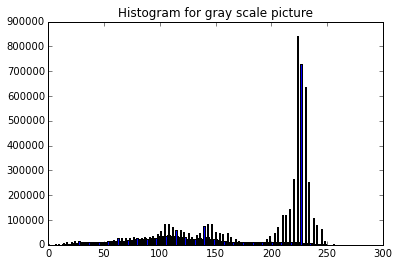

In [11]:
gray_img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])
plt.hist(gray_img.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')

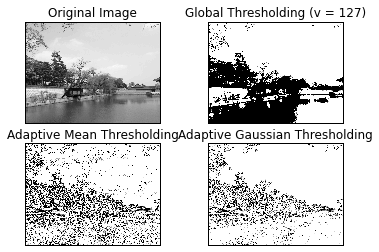

In [13]:
img = cv2.imread('./data/IMG_4137.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

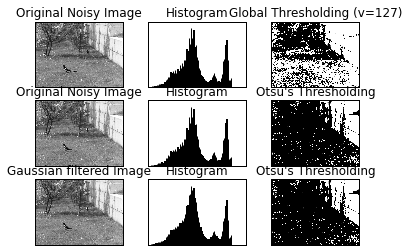

In [12]:
img = cv2.imread('./data/IMG_4153.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

(<matplotlib.text.Text at 0x14191c3d0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

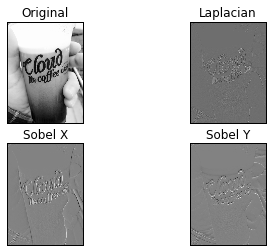

In [15]:
# loading image
img0 = cv2.imread('./data/IMG_4135.jpg',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

(<matplotlib.text.Text at 0x122bb6e10>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

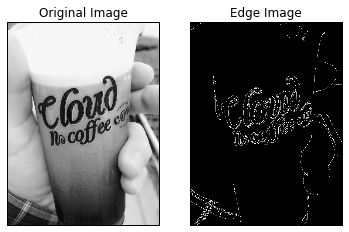

In [19]:
img = cv2.imread('./data/IMG_4135.jpg',0)
edges = cv2.Canny(img,55,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(<matplotlib.text.Text at 0x123a6f9d0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

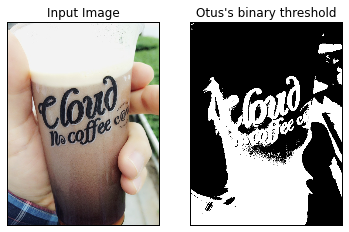

In [22]:
img = cv2.imread('./data/IMG_4135.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])

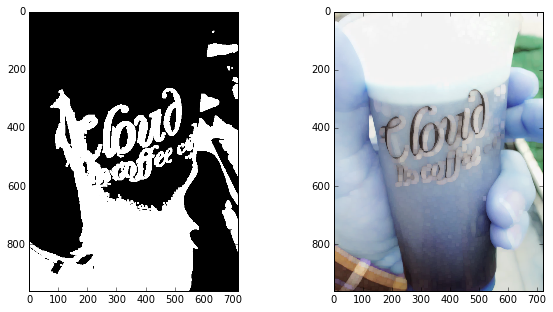

In [36]:
# noise removal
kernel = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 5)

# sure background area
sure_bg = cv2.dilate(img,kernel,iterations=10)

skdemo.imshow_all(opening, sure_bg)

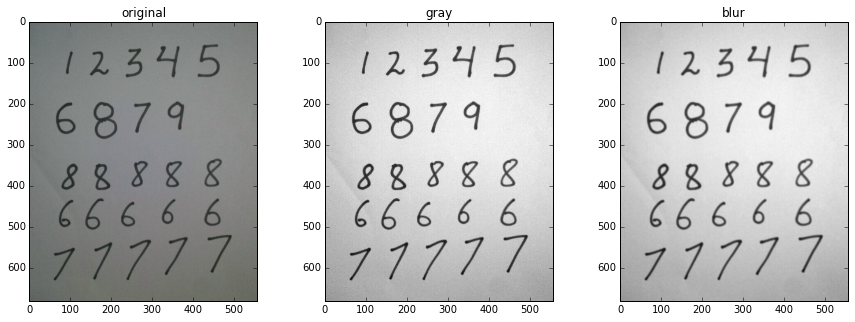

In [46]:
# Load the classifier
clf = joblib.load("../pkl/digits_cls.pkl")

# Read the input image 
im = cv2.imread("./data/digits.jpg")

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray, (5, 5), 0)

skdemo.imshow_all(im, im_gray, im_blur, titles=['original', 'gray', 'blur'])

In [49]:
# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print len(ctrs)
print hier.shape

24
(1, 24, 4)


In [50]:
# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
print rects

[(60, 551, 52, 80), (156, 538, 47, 91), (237, 532, 60, 99), (330, 525, 56, 93), (434, 520, 59, 92), (224, 440, 34, 60), (73, 435, 35, 66), (323, 433, 33, 60), (427, 432, 39, 66), (137, 431, 45, 77), (159, 347, 39, 64), (79, 347, 40, 63), (334, 341, 38, 63), (250, 341, 39, 62), (427, 335, 41, 68), (256, 199, 40, 73), (66, 198, 47, 77), (157, 197, 57, 89), (338, 196, 39, 68), (149, 74, 45, 58), (89, 74, 17, 55), (235, 67, 41, 70), (311, 61, 55, 76), (411, 57, 53, 79)]


prediction : [7] 


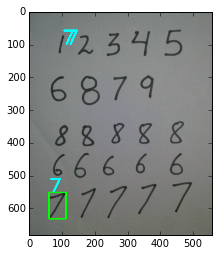

In [63]:
# cv2.rectangle(im, (세로기준점 왼쪽위, 기준점에서 얼마나 먼지), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
# rect[0] : 왼쪽에서 오른쪽
# rect[1] : 아래에서 위쪽

rect = rects[0]
cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
# cv2.rectangle(im, (세로기준점 왼쪽위, 기준점에서 얼마나 먼지), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 

leng = int(rect[3] * 1.6)
pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
roi = cv2.dilate(roi, (3, 3))

roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
print "prediction : %s " %nbr


cv2.putText(im, str(int(nbr[0])), (rect[0], (rect[3] - rect[1])), cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
plt.imshow(im)

In [2]:
# 얼굴인식하기
cascPath = "./data/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.cv.CV_HAAR_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()